This project's goal is to work on the weather classification dataset using multiple models and analysing which works best and gives the most accurate results.


Created by Anshul Bhowmik

---




# Dataset Description

Importing Libraries,
Importing Dataset,
Displaying Dataset,
Checking for duplicate and null values

In [ ]:
#Pythons libs imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Sklearn imports
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Importing dataset and displaying few cols
data = pd.read_csv('/content/weather_classification_data.csv',  na_values=['?'])
data_for_groupby = data.copy()
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
#Data Descriptions
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
#Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
#List of categories seperated by type
col_nums = data.select_dtypes(include=['number']).columns
col_cats = data.select_dtypes(include=['object']).columns
col_nums, col_cats

(Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
        'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
       dtype='object'),
 Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object'))

In [ ]:
#Checking for null rows
data.isna().any()

,0
Temperature,False
Humidity,False
Wind Speed,False
Precipitation (%),False
Cloud Cover,False
Atmospheric Pressure,False
UV Index,False
Season,False
Visibility (km),False
Location,False


In [ ]:
#Checking for duplicated rows
data.duplicated().sum()

0

# EDA


Creating visual graphs of dataset,
Boxplots for checking outliers,
Correlation matrix for multicollinearity

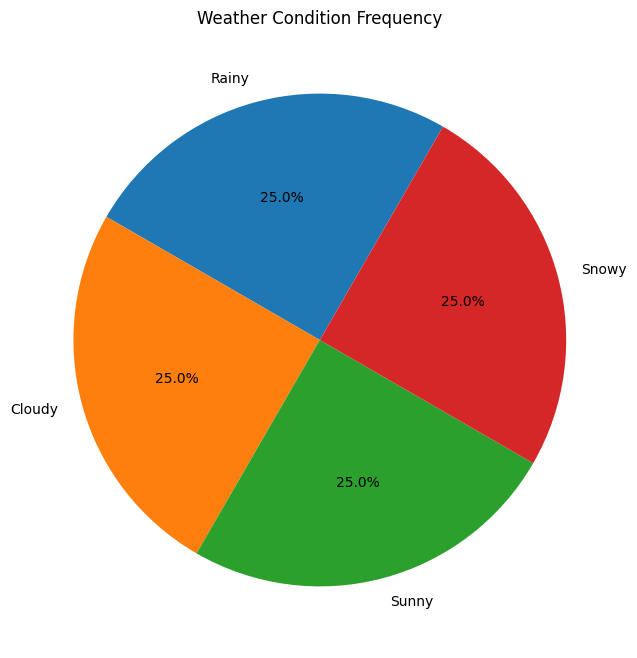

In [ ]:
#Counts of different weather conditions
val = data['Weather Type'].value_counts().values
ind = data['Weather Type'].value_counts().index
plt.figure(figsize=(8, 8))
plt.pie(val, labels=ind, autopct='%1.1f%%', startangle=60)
plt.title(f'Weather Condition Frequency')
plt.show()

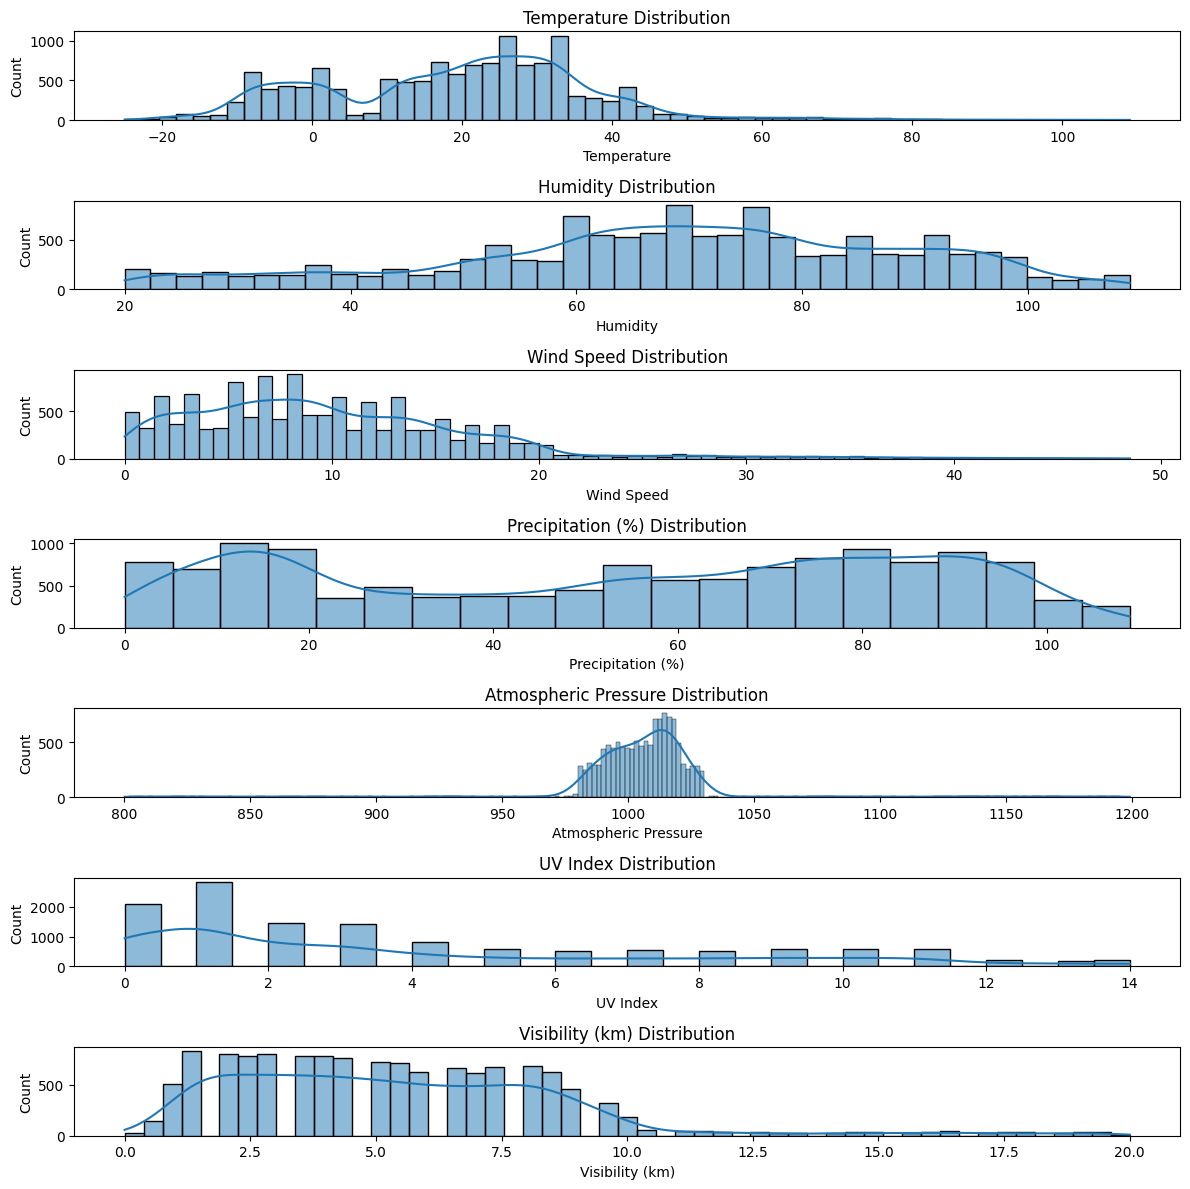

In [ ]:
#Plots of Numeric Columns
fig, axes = plt.subplots(nrows=len(col_nums), ncols=1, figsize=(12, 12))

for i, col in enumerate(col_nums):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

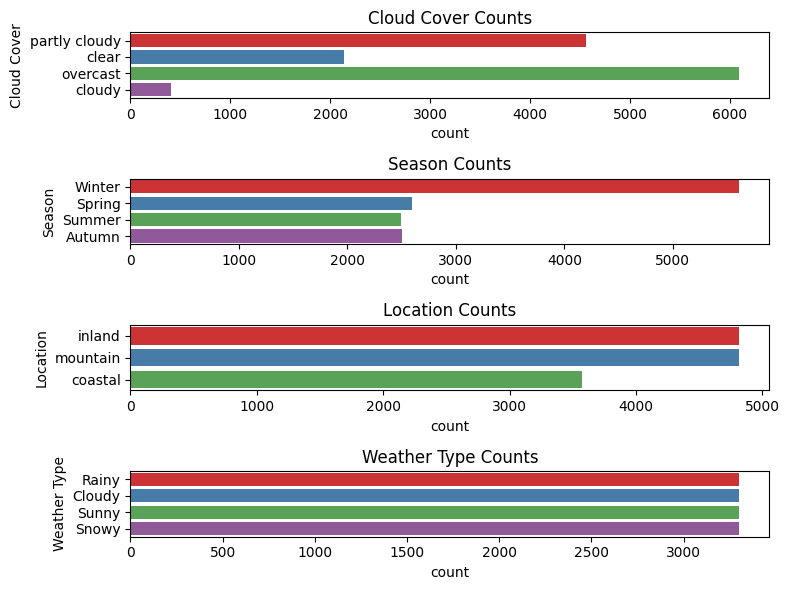

In [ ]:
#Plots of categorical columns
fig, axes = plt.subplots(nrows=len(col_cats), ncols=1, figsize=(8, 6))

for i, col in enumerate(col_cats):
    sns.countplot(y=data[col], ax=axes[i], palette = "Set1")
    axes[i].set_title(f'{col} Counts')

plt.tight_layout()
plt.show()

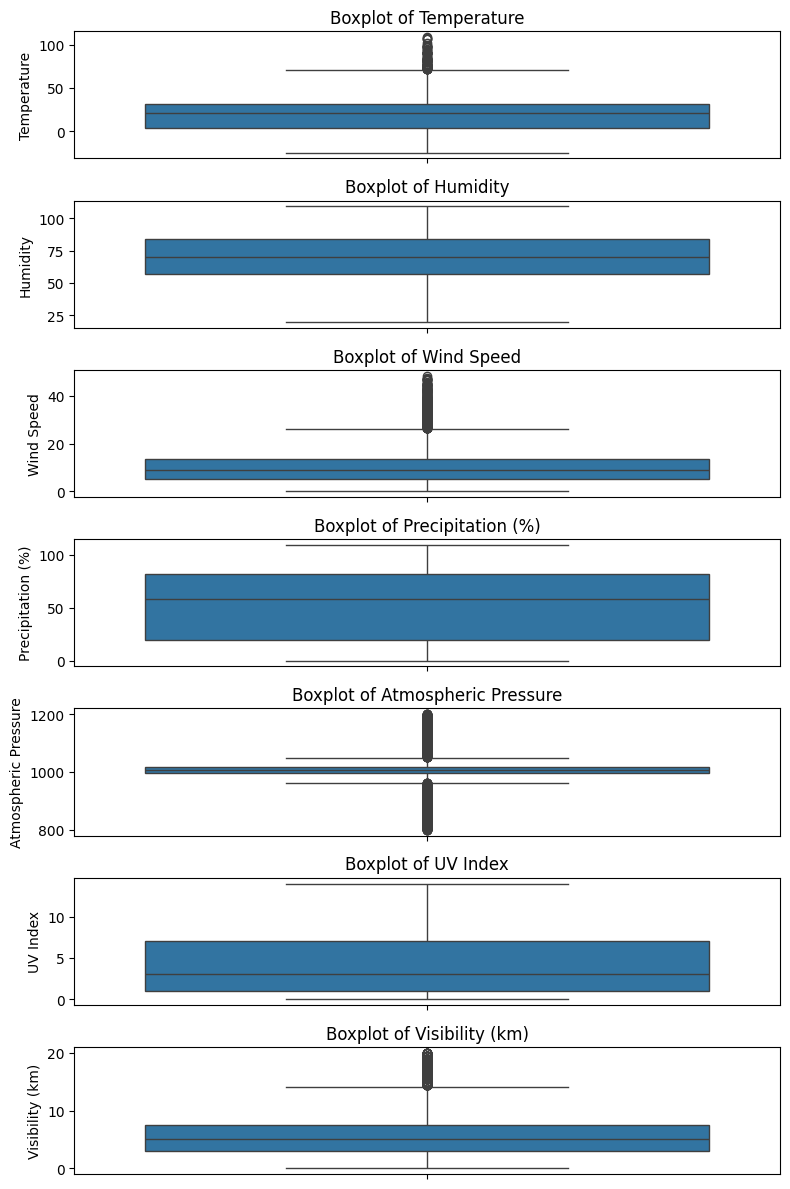

In [ ]:
#Checking outliers in numeric columns using boxplots
fig, axes = plt.subplots(nrows=len(col_nums), ncols=1, figsize=(8, 12))

for i, col in enumerate(col_nums):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

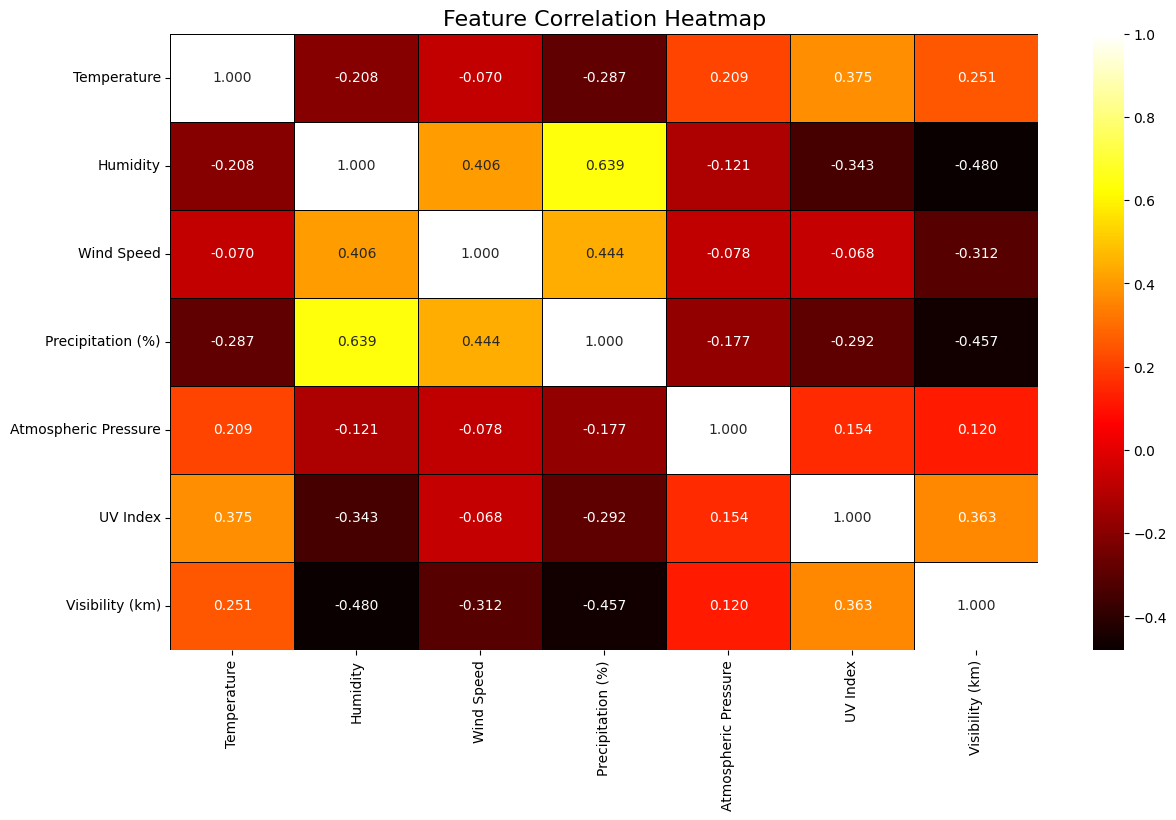

In [ ]:
#Correlation Matric Heatmap
corr_matrix = data[col_nums].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='hot', linewidths=0.5, linecolor='black', fmt=".3f")
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

# Data Processing


In [ ]:
#Function to detext outliers
def outlier_detection_iqr(df, i, upper, lower):
    emissions = df[(df[i] < lower) | (df[i] > upper)]
    df.loc[(df[i] < lower) | (df[i] > upper), i] = 'to replace'
    return df, emissions

In [ ]:
#Detecting and marking outliers using IQR
for i in col_nums:
  q1 = np.percentile(data[i], 25)
  q3 = np.percentile(data[i], 75)
  iqr = q3 - q1
  data, outlier = outlier_detection_iqr(data, i, (q3+1.5*iqr), (q1-1.5*iqr))

In [ ]:
#Replacing outliers with median
for i in col_nums:
    groupby_data = data_for_groupby.groupby(['Location', 'Weather Type'], as_index=False).agg({i: 'median'})
    for index, row in groupby_data.iterrows():
        data.loc[(data['Location'] == row['Location']) & (data['Weather Type'] == row['Weather Type']) & (data[i] == 'to replace') , i] = row[i]

In [ ]:
#Ensuring columns remain as float datatype
data[col_nums] = data[col_nums].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  float64
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  float64
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.1+ MB


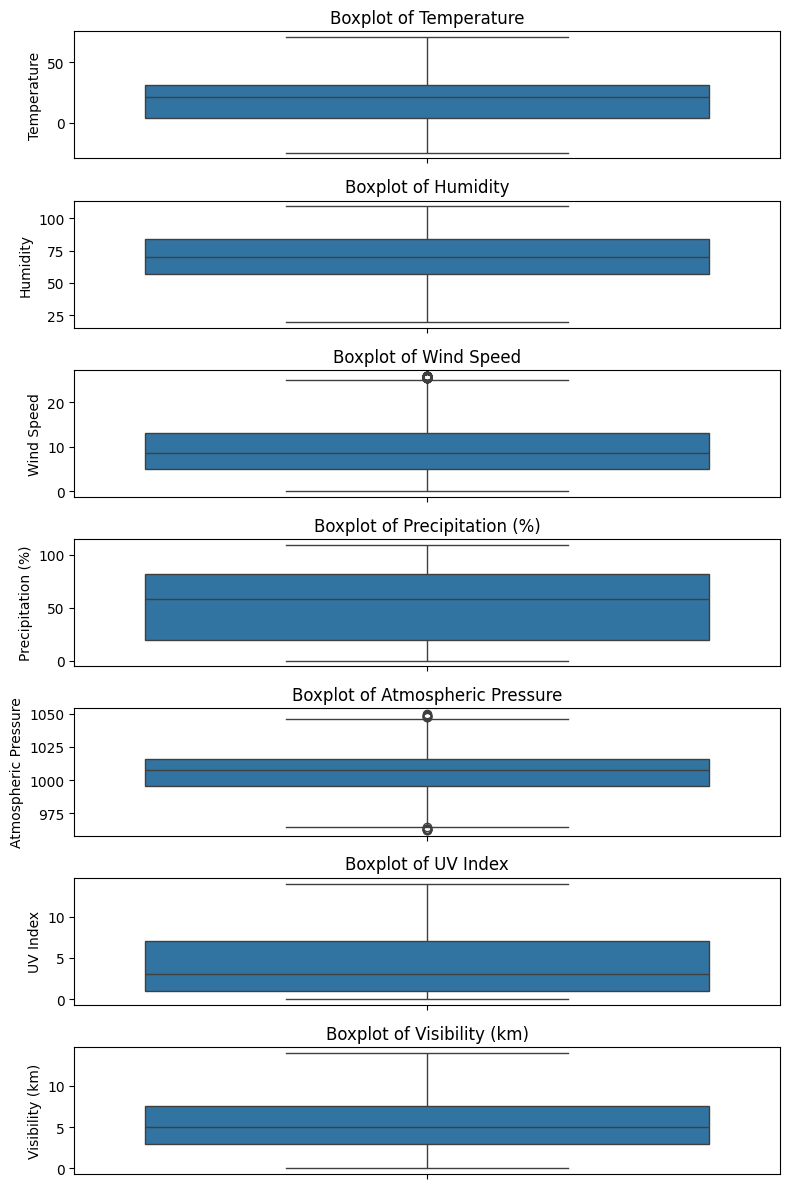

In [ ]:
#Rechecking outliers using boxplots
fig, axes = plt.subplots(nrows=len(col_nums), ncols=1, figsize=(8, 12))

for i, col in enumerate(col_nums):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Data Encoding

In [ ]:
#Creating iterable of categorical columns
col_cats = list(col_cats)
col_cats.remove('Weather Type')
col_cats

['Cloud Cover', 'Season', 'Location']

In [ ]:
#Encoding categorical columns using OneHotEncoding
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[col_cats])
encoded_data = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(col_cats))
data = data.join(encoded_data)

#Dropping redundant categorical columns
data = data.drop(col_cats, axis=1)

data

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73.0,9.5,82.0,1010.82,2.0,3.5,Rainy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,39.0,96.0,8.5,71.0,1011.43,7.0,10.0,Cloudy,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,30.0,64.0,7.0,16.0,1018.72,5.0,5.5,Sunny,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,38.0,83.0,1.5,82.0,1026.25,7.0,1.0,Sunny,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,27.0,74.0,17.0,66.0,990.67,1.0,2.5,Rainy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,1003.15,1.0,1.0,Rainy,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13196,-1.0,76.0,3.5,23.0,991.96,1.0,6.0,Snowy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
13197,30.0,77.0,5.5,28.0,1012.69,3.0,9.0,Cloudy,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13198,3.0,76.0,10.0,94.0,984.27,0.0,2.0,Snowy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#Transforming weather type to encoded format
le = LabelEncoder()
data['Weather Encoded'] = le.fit_transform(data['Weather Type'])
data.groupby('Weather Encoded').head(1).reset_index(drop=True)

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Weather Encoded
0,14.0,73.0,9.5,82.0,1010.82,2.0,3.5,Rainy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,39.0,96.0,8.5,71.0,1011.43,7.0,10.0,Cloudy,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,30.0,64.0,7.0,16.0,1018.72,5.0,5.5,Sunny,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
3,-2.0,97.0,8.0,86.0,990.87,1.0,4.0,Snowy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2


In [ ]:
#Saving the encoding of weather conditions as a dictionary
weather_categories = dict(zip(data['Weather Encoded'], data['Weather Type']))
print(weather_categories)

{1: 'Rainy', 0: 'Cloudy', 3: 'Sunny', 2: 'Snowy'}


In [ ]:
#Dropping categorical column Weather Type
data.drop('Weather Type', axis=1, inplace=True)
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Weather Encoded
0,14.0,73.0,9.5,82.0,1010.82,2.0,3.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,39.0,96.0,8.5,71.0,1011.43,7.0,10.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,30.0,64.0,7.0,16.0,1018.72,5.0,5.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
3,38.0,83.0,1.5,82.0,1026.25,7.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
4,27.0,74.0,17.0,66.0,990.67,1.0,2.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


# Data Scaling

In [ ]:
#Splitting data into 8:2 training and testing
X = data.drop(columns='Weather Encoded')
y = data['Weather Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Scaling test and test data seperately
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)
X_train.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
3958,0.593750,0.516854,0.230769,0.844037,0.546868,0.142857,0.107143,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2239,0.416667,0.853933,0.423077,0.522936,0.624827,0.000000,0.285714,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.552083,0.426966,0.250000,0.100917,0.721442,0.714286,0.642857,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6848,0.750000,0.719101,0.480769,0.779817,0.340166,0.142857,0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6119,0.447917,0.516854,0.538462,0.091743,0.429756,0.071429,0.571429,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model Fitting

Fitting Logistic Regression, Decision Tree, Naive Bayes, Random Forest, XG Boost models

In [ ]:
#Fitting Logistic Regression Model
model_lr = LogisticRegression(multi_class='ovr', solver='liblinear')
model_lr.fit(X_train, y_train)

#Fitting Decision Tree Model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

#Fitting Naive Bayes Model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

#Fitting Random Forest Model
model_rf = RandomForestClassifier(n_estimators = 100)
model_rf.fit(X_train, y_train)

#Fitting XG Boost Model
model_xg = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Predicting values on the testing data
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_nb = model_nb.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xg = model_xg.predict(X_test)

# Evaluation Metrics

In [ ]:
#Generating accuracy scores of prediction for all models
print(f'Accuracy Score of Logistic Regression : {round(accuracy_score(y_test, y_pred_lr),2)}')
print(f'Accuracy Score of Decision Tree : {round(accuracy_score(y_test, y_pred_dt),2)}')
print(f'Accuracy Score of Naive Bayes : {round(accuracy_score(y_test, y_pred_nb),2)}')
print(f'Accuracy Score of Random Forest : {round(accuracy_score(y_test, y_pred_rf),2)}')
print(f'Accuracy Score of XG Boost : {round(accuracy_score(y_test, y_pred_xg),2)}')

Accuracy Score of Logistic Regression : 0.88
Accuracy Score of Decision Tree : 0.95
Accuracy Score of Naive Bayes : 0.83
Accuracy Score of Random Forest : 0.96
Accuracy Score of XG Boost : 0.91


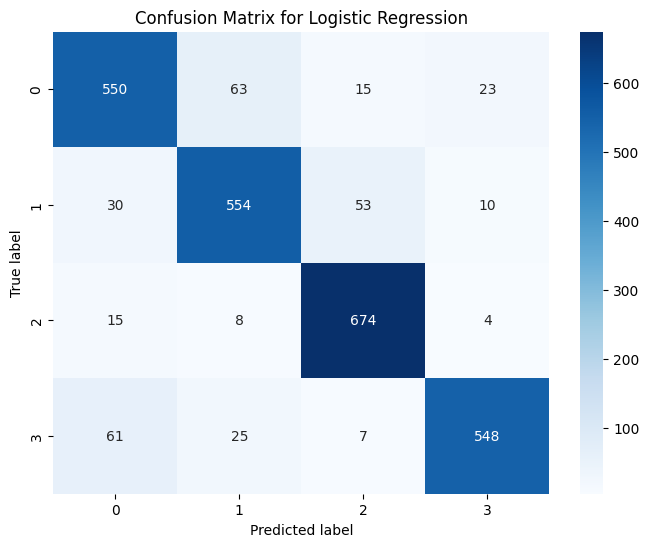

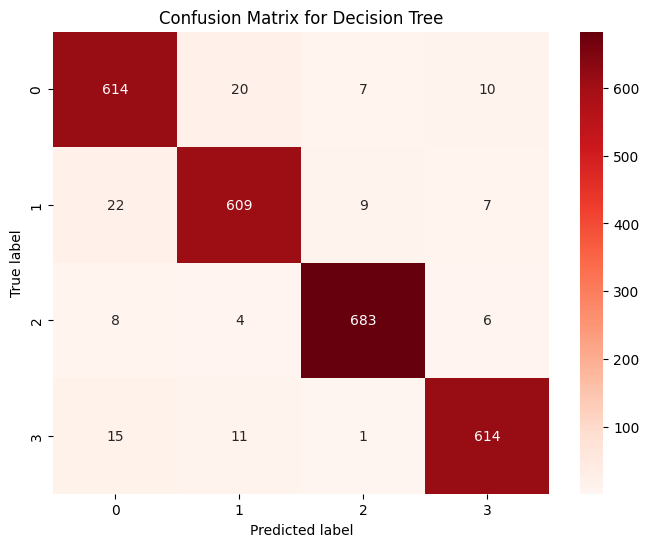

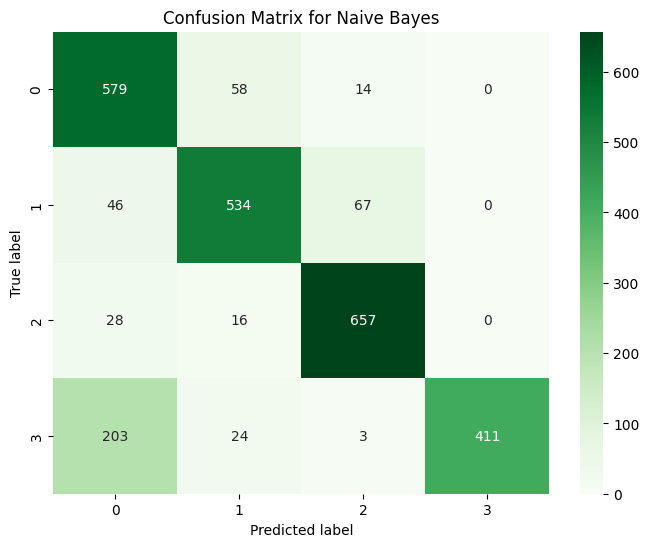

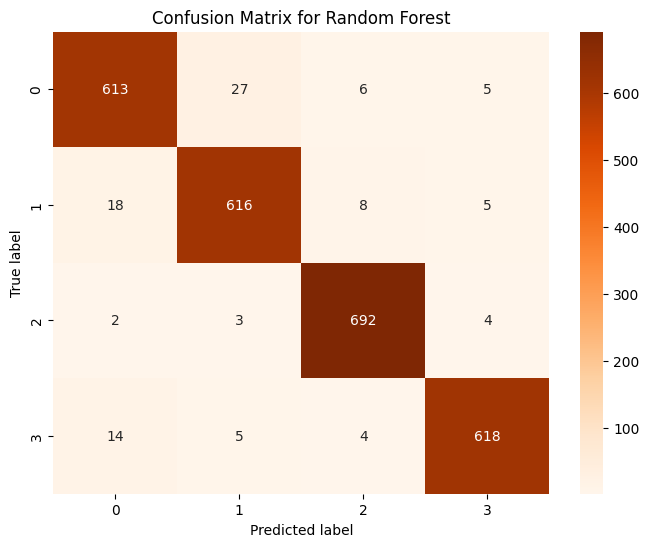

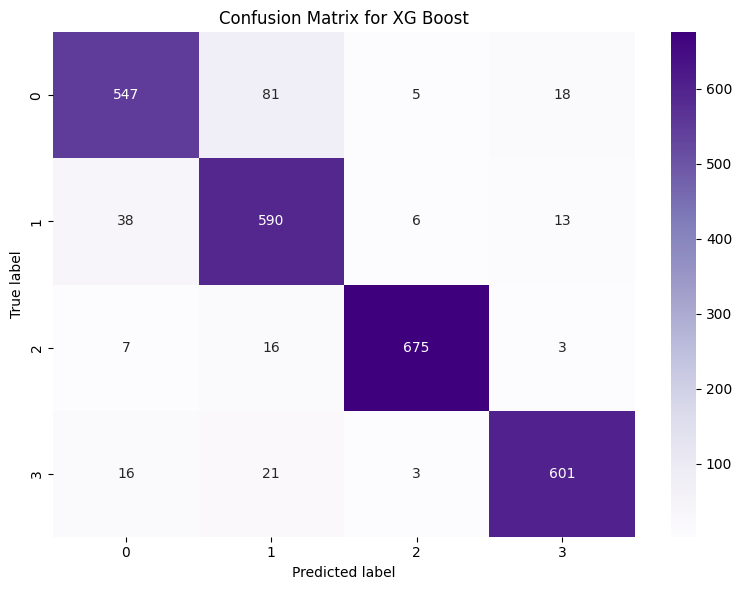

In [ ]:
#Generating confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xg = confusion_matrix(y_test, y_pred_xg)

#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xg, annot=True, cmap='Purples', fmt='d')
plt.title('Confusion Matrix for XG Boost')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:
#Generating Classification Reports for models
report_lr = classification_report(y_test, y_pred_lr)
report_dt = classification_report(y_test, y_pred_dt)
report_nb = classification_report(y_test, y_pred_nb)
report_rf = classification_report(y_test, y_pred_rf)
report_xg = classification_report(y_test, y_pred_xg)

print("Reports:")
print(report_lr, report_dt, report_nb, report_rf, report_xg, sep = '\n--------------------------------------------------------\n')

Reports:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       651
           1       0.85      0.86      0.85       647
           2       0.90      0.96      0.93       701
           3       0.94      0.85      0.89       641

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640

--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       651
           1       0.95      0.94      0.94       647
           2       0.98      0.97      0.98       701
           3       0.96      0.96      0.96       641

    accuracy                           0.95      2640
   macro avg       0.95      0.95      0.95      2640
weighted avg       0.95      0.95      0.95      2640

--------------------------------------------------------
       

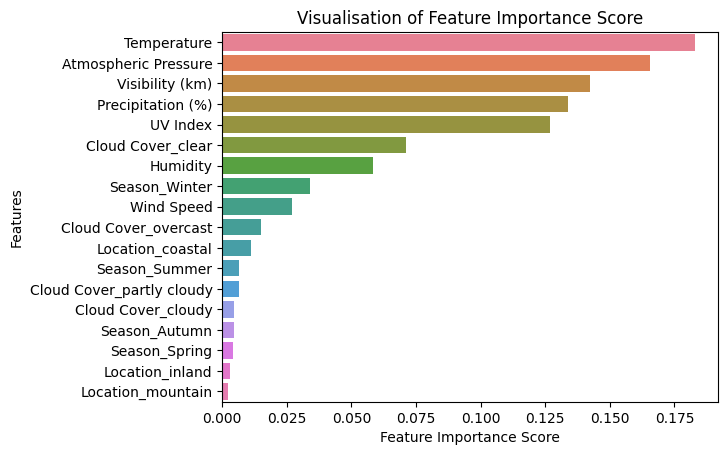

In [ ]:
#Analysing Feature Importance in the models
feature_scores = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_scores, y=feature_scores.index, palette='husl')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualisation of Feature Importance Score")

plt.show()

# Principal Component Analysis

In [ ]:
#Copying data to perform PCA on
data_for_pca = data.copy()
X = data_for_pca.drop(columns='Weather Encoded')
y = data_for_pca['Weather Encoded']

#Splitting the dataset for testing and training
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the dataset using Standard Scaler
scaling=StandardScaler()
scaling.fit(X_train_pca)
X_train_pca=scaling.transform(X_train_pca)
X_test_pca=scaling.transform(X_test_pca)

#Performing pca and keeping 95% variance intact, with minimum number of components
pca = PCA(.95)
pca.fit(X_train_pca)
X_train_pca=pca.transform(X_train_pca)
X_test_pca=pca.transform(X_test_pca)

print(f'Number of components: {pca.n_components_}')
pd.DataFrame(X_test_pca)

Number of components: 13


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.706191,-1.749969,1.372593,-1.128308,0.208599,-1.591062,-1.517212,0.049191,-0.127816,-0.194236,-0.616963,0.215814,0.870313
1,1.815874,1.167234,1.178356,-1.703453,-3.349044,-0.110343,-0.719265,0.445179,2.704739,0.762654,0.496078,-0.804799,-0.065365
2,3.060310,-0.298511,-1.103372,1.806137,0.149138,1.924715,-1.051286,-0.007640,-0.568966,0.217826,0.821758,0.643501,-0.824241
3,-3.168330,-1.058864,1.421218,-0.561467,0.180056,-0.035388,0.250637,-0.170278,-0.353663,0.769973,-0.257426,-0.207617,-0.088407
4,1.114332,1.171199,-1.206301,1.596973,-0.214098,1.919837,-1.652457,0.563156,1.433131,0.614687,1.426015,1.551104,1.137775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,1.331018,2.235855,0.044671,0.940029,-0.968806,-0.305307,2.007457,-0.418602,-0.827297,0.596251,0.135889,-0.930503,-0.261844
2636,-1.949445,-0.698744,-1.479483,-0.194787,-0.308352,0.004274,-0.214578,-0.528143,0.167808,-0.457432,1.173512,-0.258968,-0.107362
2637,-3.029956,-1.116390,-1.459094,0.011659,0.029574,-0.029608,0.127142,-0.386100,-0.210994,1.277150,0.462868,-0.266043,0.141283
2638,-2.453509,-0.199568,-0.975135,2.415182,0.051782,-0.181796,0.006262,-0.373956,0.879768,1.136183,-0.250046,-0.543554,0.357733


In [ ]:
#Fitting Random Forest Model
model_pca = RandomForestClassifier(n_estimators = 100)
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

print(f'Accuracy Score of PCA Random Forest : {round(accuracy_score(y_test_pca, y_pred_pca),2)}')

Accuracy Score of PCA Random Forest : 0.91


Text(70.72222222222221, 0.5, 'True label')

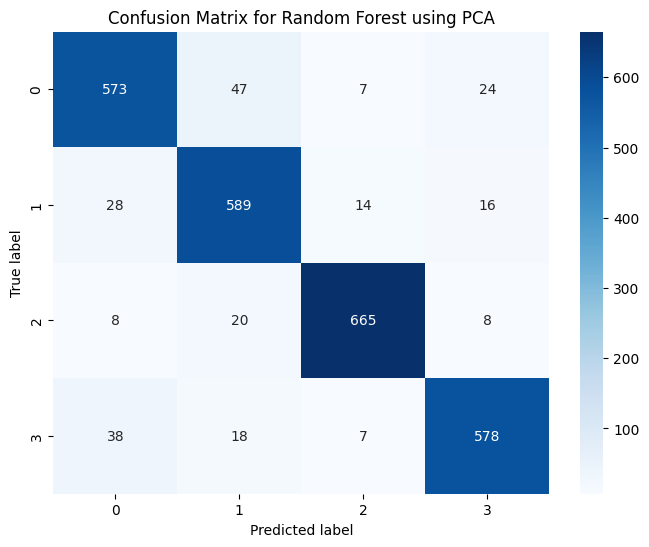

In [ ]:
#Confusion Matrix
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Random Forest using PCA')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
# Generate classification report
report = classification_report(y_test_pca, y_pred_pca, zero_division=0.0)
print("Report:")
print(report)

Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       651
           1       0.87      0.91      0.89       647
           2       0.96      0.95      0.95       701
           3       0.92      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



# User Inputs

In [ ]:
#Copying dataframe and extracting column names
user_in = data.copy()
user_in = user_in.to_dict(orient='list')

for value in user_in.values():
    del value[:]

user_in

{'Temperature': [],
 'Humidity': [],
 'Wind Speed': [],
 'Precipitation (%)': [],
 'Atmospheric Pressure': [],
 'UV Index': [],
 'Visibility (km)': [],
 'Cloud Cover_clear': [],
 'Cloud Cover_cloudy': [],
 'Cloud Cover_overcast': [],
 'Cloud Cover_partly cloudy': [],
 'Season_Autumn': [],
 'Season_Spring': [],
 'Season_Summer': [],
 'Season_Winter': [],
 'Location_coastal': [],
 'Location_inland': [],
 'Location_mountain': [],
 'Weather Encoded': []}

d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)

In [ ]:
#User inputs for each column
user_in['Temperature'].append(32.0)
user_in['Humidity'].append(76.0)
user_in['Wind Speed'].append(9.5)
user_in['Precipitation (%)'].append(22.0)
user_in['Atmospheric Pressure'].append(998.2)
user_in['UV Index'].append(3.0)
user_in['Visibility (km)'].append(13.0)
user_in['Cloud Cover_clear'].append(0.0)
user_in['Cloud Cover_cloudy'].append(0.0)
user_in['Cloud Cover_overcast'].append(0.0)
user_in['Cloud Cover_partly cloudy'].append(1.0)
user_in['Season_Autumn'].append(0.0)
user_in['Season_Spring'].append(0.0)
user_in['Season_Summer'].append(1.0)
user_in['Season_Winter'].append(0.0)
user_in['Location_coastal'].append(1.0)
user_in['Location_inland'].append(0.0)
user_in['Location_mountain'].append(0.0)
user_in['Weather Encoded'].append(3)
user_in

{'Temperature': [32.0],
 'Humidity': [76.0],
 'Wind Speed': [9.5],
 'Precipitation (%)': [22.0],
 'Atmospheric Pressure': [998.2],
 'UV Index': [3.0],
 'Visibility (km)': [13.0],
 'Cloud Cover_clear': [0.0],
 'Cloud Cover_cloudy': [0.0],
 'Cloud Cover_overcast': [0.0],
 'Cloud Cover_partly cloudy': [1.0],
 'Season_Autumn': [0.0],
 'Season_Spring': [0.0],
 'Season_Summer': [1.0],
 'Season_Winter': [0.0],
 'Location_coastal': [1.0],
 'Location_inland': [0.0],
 'Location_mountain': [0.0],
 'Weather Encoded': [3]}

In [ ]:
#Converting dictionary to dataframe
data_user = pd.DataFrame(user_in)
data_user

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Weather Encoded
0,32.0,76.0,9.5,22.0,998.2,3.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3


In [ ]:
#Getting prediction using Random Forest model
X_user = data_user.drop(columns='Weather Encoded')
y_user = data_user['Weather Encoded']

y_user_pred = model_rf.predict(X_user)
print(f'The weather condition prediction by model is: {weather_categories[y_user_pred[0]]}')

The weather condition prediction by model is: Sunny
